In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
import keras.backend as K
%matplotlib inline

/home/kopita/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kopita/anaconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

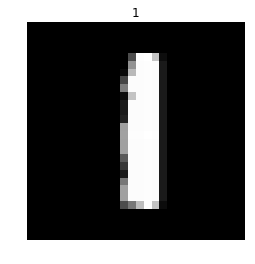

In [3]:
random_idx = np.random.choice(60000)
plt.imshow(x_train[random_idx], 'gray')
plt.title(y_train[random_idx])
plt.axis('off');

In [4]:
# Preprocesar las imagenes
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

# Agregamos una dimensión para los canales de la imagen, dado
# que la imagen esta en escala de grises, tiene solo un canal
x_train = x_train[..., None]
x_test = x_test[..., None]

x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [5]:
y_train[0]

5

In [6]:
# One-hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Usando una red convolucional

In [28]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [8]:
log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 447us/step - loss: 1.8513 - acc: 0.5604 - val_loss: 0.8973 - val_acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 25s 412us/step - loss: 0.5265 - acc: 0.8676 - val_loss: 0.3441 - val_acc: 0.9089
Epoch 3/5
60000/60000 [==============================] - 26s 433us/step - loss: 0.3122 - acc: 0.9110 - val_loss: 0.2594 - val_acc: 0.9279
Epoch 4/5
60000/60000 [==============================] - 25s 411us/step - loss: 0.2482 - acc: 0.9279 - val_loss: 0.2193 - val_acc: 0.9361
Epoch 5/5
60000/60000 [==============================] - 27s 446us/step - loss: 0.2108 - acc: 0.9383 - val_loss: 0.1813 - val_acc: 0.9466


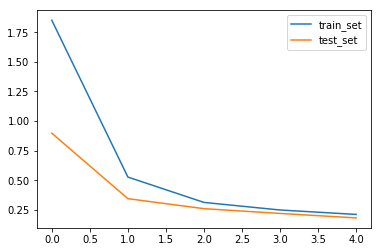

In [14]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

# Visualizando los filtros

In [10]:
kernels = model.layers[0].kernel
kernels

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 16) dtype=float32_ref>

In [11]:
kernels = K.eval(kernels)
kernels.shape

(3, 3, 1, 16)

In [12]:
kernels = kernels[:,:,0,:]
kernels.shape

(3, 3, 16)

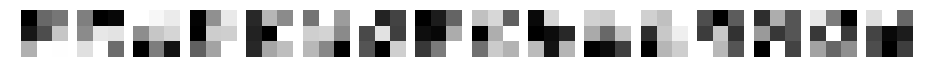

In [15]:
fig, axes = plt.subplots(1, kernels.shape[2], figsize=(16,4))

for i in range(kernels.shape[2]):
    axes[i].imshow(kernels[:,:,i], 'gray')
    axes[i].axis('off')

# Regularización

In [21]:
from keras.layers import BatchNormalization, Dropout

In [29]:
model = Sequential()

model.add(Dropout(0.1, input_shape=(28,28,1)))
model.add(Conv2D(16, 3, padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Dropout(0.1))
model.add(Conv2D(32, 3, padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4608      
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)        128       
__________

In [30]:
log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.7664 - acc: 0.7791 - val_loss: 0.1692 - val_acc: 0.9497
Epoch 2/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3139 - acc: 0.9059 - val_loss: 0.1235 - val_acc: 0.9626
Epoch 3/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2400 - acc: 0.9271 - val_loss: 0.1036 - val_acc: 0.9677
Epoch 4/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2057 - acc: 0.9364 - val_loss: 0.0882 - val_acc: 0.9736
Epoch 5/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1813 - acc: 0.9443 - val_loss: 0.0791 - val_acc: 0.9760


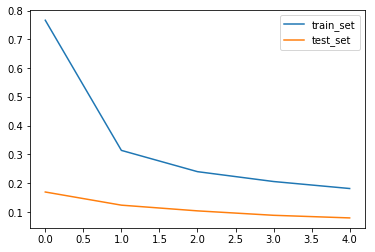

In [31]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

In [32]:
model.evaluate(x_train, y_train, batch_size=512)

60000/60000 [==============================] - 20s 335us/step


[0.08741666022141774, 0.9740499999682108]

In [33]:
model.evaluate(x_test, y_test, batch_size=512)

10000/10000 [==============================] - 3s 326us/step


[0.07911867349147797, 0.9759999992370606]

# MC Dropout

[Dropout as a Bayesian Approximation](https://arxiv.org/abs/1506.02142)

En los ensembles tipo bagging, las predicciones que hacemos son el promedio de todos los modelos entrenados. En el caso de dropout, al momento de entrenar, el modelo va a ver un conjunto diferente de features en cada batch (como si cada batch fuera un modelo distinto); y al momento de hacer predicciones, se usan todos los features (esto se interpretaria como el promedio de todos los modelos).

En el caso de ensembles, ademas del promedio, podemos sacar una desviacion estandar de las predicciones, para darnos una idea de la certeza de la prediccion. Para hacer algo parecido en el caso de dropout, tendriamos que tener un conjunto de resultados de cada modelo, para hacer esto vamos a necesitar usar dropout no solo al momento de entrenar, sino al momento de usar el modelo. Para forzar este comportamiento vamos a usar:

`model.add(Lambda(lambda x: K.dropout(x, level=0.5)))`

En lugar de:

`model.add(Dropout(0.5))`

In [10]:
from keras.layers import Lambda

In [11]:
model = Sequential()

model.add(Lambda(lambda x: K.dropout(x, level=0.1), input_shape=(28,28,1)))
model.add(Conv2D(16, 3, padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Lambda(lambda x: K.dropout(x, level=0.1)))
model.add(Conv2D(32, 3, padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Flatten())
model.add(Lambda(lambda x: K.dropout(x, level=0.5)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

In [12]:
log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 60s 1ms/step - loss: 0.8651 - acc: 0.7506 - val_loss: 0.4137 - val_acc: 0.8740
Epoch 2/3
60000/60000 [==============================] - 57s 948us/step - loss: 0.3298 - acc: 0.8995 - val_loss: 0.2624 - val_acc: 0.9148
Epoch 3/3
60000/60000 [==============================] - 56s 940us/step - loss: 0.2515 - acc: 0.9229 - val_loss: 0.2115 - val_acc: 0.9332


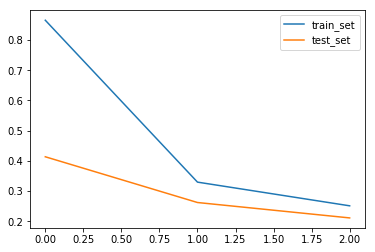

In [13]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

## Veamos las predicciones del modelo

In [93]:
# Vamos a examinar un caso del test set
i = 9
sample_x = x_test[i, None]

# Vemos el resultado esperado
np.argmax(y_test[i])

9

In [94]:
# Si ejecutamos varias veces esta linea, vamos a ver que se obtienen distintos resultados
model.predict(sample_x)

array([[1.3880233e-05, 3.3217989e-06, 1.5656755e-05, 9.7431539e-06,
        6.5398439e-05, 4.8672537e-05, 3.4001548e-06, 5.3743016e-02,
        1.3872043e-03, 9.4470966e-01]], dtype=float32)

In [95]:
# Para obtener un promedio y una desviacion estandar,
# vamos a hacer varias replicas de nuestro ejemplo
rep_sample_x = sample_x.repeat(1000, axis=0)
rep_sample_x.shape

(1000, 28, 28, 1)

In [96]:
preds = model.predict(rep_sample_x)
preds.shape

(1000, 10)

In [97]:
# Podemos ver el promedio de las predicciones
y_ = preds.mean(axis=0)
y_

array([5.5872811e-06, 9.4061072e-08, 7.0962324e-06, 3.8917977e-05,
       9.9917839e-04, 3.0054228e-04, 2.3316240e-07, 4.3493636e-02,
       4.2199367e-03, 9.5093513e-01], dtype=float32)

In [98]:
# Y tambien las desviaciones
std = preds.std(axis=0)
std

array([5.2996464e-05, 6.5679575e-07, 5.9659204e-05, 3.8384524e-04,
       1.0425385e-02, 1.8353967e-03, 1.0703092e-06, 1.2052647e-01,
       2.1114130e-02, 1.2356905e-01], dtype=float32)

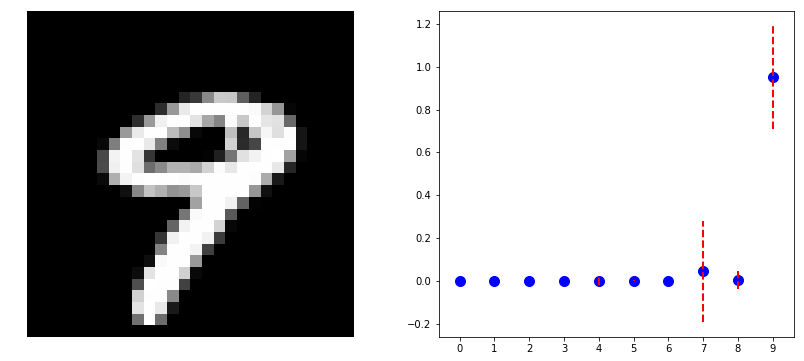

In [99]:
# Veamos la informacion en un plot
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
ax[0].axis('off')


# 1.96 = intervalo de confianza 95%
# 2.58 = intervalo de confianza 99%
conf = 1.96
std_lines = [(y - conf*std[i], y + conf*std[i]) for i,y in enumerate(y_)]

for i, (y1,y2) in enumerate(std_lines):
    ax[1].vlines(i, y1, y2, 'red', 'dashed', linewidth=2)
    
ax[1].scatter(range(10), y_, s=100, c='b')
ax[1].set_xticks(range(10))
plt.show()